# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrEu-2019-02-19.zip
unzip autoriaNumberplateOcrEu-2019-02-19.zip
mv autoriaNumberplateOcrEu-2019-02-19 eu
```
or use your own dataset.
<p style="border:1px solid gray; padding: 0px 4px; color:#a77;"><b>Accuracy increase hint:</b> <i>Add to train ukrainian dataset from autoriaNumberplateOcrUa-2020-07-14.zip</i></p>


In [24]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [25]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [26]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "eu"
VERSION = "2020_10_08_tensorflow_v2.3"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [27]:
class eu(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M", "O", "P", "T", "X"]
        
        self.EPOCHS = 2

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'D', '1', 'U', 'J', 'B', 'G', 'K', 'O', 'R', '6', '8', 'C', 'A', 'T', 'P', 'X', 'M', 'V', 'F', '2', 'W', 'Y', 'E', '0', 'H', '9', 'Z', 'I', 'Q', '5', '3', 'L', 'N', '4', 'S', '7'}
Letters val  {'U', '1', 'D', 'J', 'B', 'G', 'K', 'O', 'R', '6', '8', 'C', 'A', 'T', 'M', 'P', 'X', 'V', 'F', '2', 'W', 'Y', 'E', '0', 'H', '9', 'Z', 'I', 'Q', '5', '3', 'L', 'N', '4', 'S', '7'}
Letters test  {'D', '1', 'U', 'J', 'B', 'G', 'K', 'O', '6', 'R', '8', 'C', 'A', 'T', 'P', 'M', 'V', 'F', '2', 'W', 'Y', 'S', 'E', '0', '7', 'H', '9', 'Z', 'I', 'Q', '3', 'L', 'N', '4', 'X', '5'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


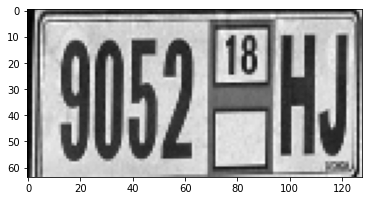

2) the_labels (plate number): 9052HJ is encoded as [9, 0, 5, 2, 17, 19, 37, 37, 37]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 6
START BUILD DATA
DATA PREPARED


In [28]:
ocrTextDetector = eu()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=0)

In [15]:
# A = {'D', '1', 'U', 'J', 'Х', 'Б', 'B', 'G', 'K', 'O', 'Ч', 'R', '6', '8', 'З', 'C', 'A', 'T', 'P', 'X', 'M', 'С', 'А', 'V', 'F', '2', 'W', 'О', 'Y', 'E', 'Г', '0', 'П', 'Д', 'H', '9', 'Z', 'I', 'Q', 'М', '5', '3', 'L', 'N', '4', 'Р', 'S', '7'}
# B = {'D', '1', 'U', 'J', 'B', 'G', 'K', 'O', '6', 'R', '8', 'C', 'A', 'T', 'P', 'M', 'V', 'F', '2', 'W', 'Y', 'S', 'E', '0', '7', 'H', '9', 'Z', 'I', 'Q', '3', 'L', 'N', '4', 'X', '5'}
# A-B

In [16]:
model = ocrTextDetector.train(is_random=1)


START TRAINING
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
______________________________________________________________________________

In [17]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 HR25662
True: 			 LHR25662

Predicted: 		 WD0044D
True: 			 WD094WD

Predicted: 		 HR25662
True: 			 LHR25662

Predicted: 		 PMF0231
True: 			 PMFO231

Predicted: 		 LZA59506
True: 			 LZA59596

Predicted: 		 130202
True: 			 EZ302DZ

Predicted: 		 SP04759
True: 			 P04759

Predicted: 		 A04629
True: 			 RA04629

Predicted: 		 EZ677X
True: 			 EZ677LX

Predicted: 		 SEO162
True: 			 CEO162

Predicted: 		 DQ732RVG
True: 			 DQ732RV

Predicted: 		 RUI47WV
True: 			 RLU47WV

Predicted: 		 L04624
True: 			 SL04624

Predicted: 		 RSA3187
True: 			 RSA31825

Predicted: 		 NFU329M
True: 			 WF0529M

Predicted: 		 WWL67340
True: 			 WWL67370

Predicted: 		 38PN077
True: 			 35PN077

Predicted: 		 POS01650
True: 			 P0S01650

Predicted: 		 OST50J8
True: 			 0ST50J8

Predicted: 		 KI44317
True: 			 TKI44317

Predicted: 		 FNN940
True: 			 FNN942

Predicted: 		 KJV94
True: 			 KJV941

Predicted: 		 W1355I
True: 			 W1355T

Predicted: 		 LOP29593
True: 			 L0P29593

Predic

In [21]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /home/www/nomeroff-net/models/anpr_ocr_eu_2020_10_08_tensorflow_v2.3.h5


GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'D', '1', 'U', 'J', 'B', 'G', 'K', 'O', 'R', '6', '8', 'C', 'A', 'T', 'P', 'X', 'M', 'V', 'F', '2', 'W', 'Y', 'E', '0', 'H', '9', 'Z', 'I', 'Q', '5', '3', 'L', 'N', '4', 'S', '7'}
Letters val  {'U', '1', 'D', 'J', 'B', 'G', 'K', 'O', 'R', '6', '8', 'C', 'A', 'T', 'M', 'P', 'X', 'V', 'F', '2', 'W', 'Y', 'E', '0', 'H', '9', 'Z', 'I', 'Q', '5', '3', 'L', 'N', '4', 'S', '7'}
Letters test  {'D', '1', 'U', 'J', 'B', 'G', 'K', 'O', '6', 'R', '8', 'C', 'A', 'T', 'P', 'M', 'V', 'F', '2', 'W', 'Y', 'S', 'E', '0', '7', 'H', '9', 'Z', 'I', 'Q', '3', 'L', 'N', '4', 'X', '5'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


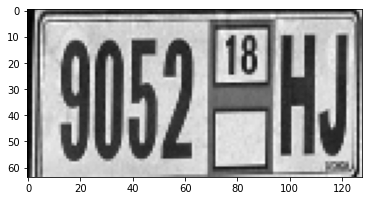

2) the_labels (plate number): 9052HJ is encoded as [9, 0, 5, 2, 17, 19, 37, 37, 37]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 6
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_49"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_____________________________

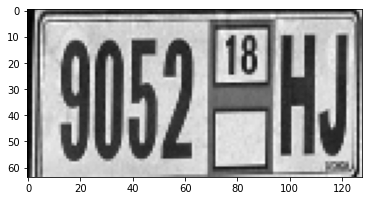

2) the_labels (plate number): 9052HJ is encoded as [9, 0, 5, 2, 17, 19, 37, 37, 37]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 6
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_53"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_____________________________

In [31]:
# Train with aug
for i in range(2):
    ocrTextDetector = eu()
    ocrTextDetector.EPOCHS = 2

    model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

    model = ocrTextDetector.train(load_last_weights=True)

    ocrTextDetector.test(verbose=True)

In [32]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 PMF0231
True: 			 PMFO231

Predicted: 		 LZA5959C
True: 			 LZA59596

Predicted: 		 EZ30202
True: 			 EZ302DZ

Predicted: 		 EZ677X
True: 			 EZ677LX

Predicted: 		 GEO162
True: 			 CEO162

Predicted: 		 L04624
True: 			 SL04624

Predicted: 		 RPR2274
True: 			 RPR22724

Predicted: 		 LKI44317
True: 			 TKI44317

Predicted: 		 CB4342MP
True: 			 CB4362MP

Predicted: 		 EC777RNS
True: 			 EC777RN

Predicted: 		 RSA72603
True: 			 RSA12603

Predicted: 		 BS858VC
True: 			 BS838WC

Predicted: 		 913AM0
True: 			 913AMD

Predicted: 		 FZG29391
True: 			 FZG29591

Predicted: 		 CD9223BH
True: 			 CO9223BH

Predicted: 		 RP43020
True: 			 RP43027
Test processing time: 0.3509984016418457 seconds
acc: 0.9825897714907508


In [33]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /home/www/nomeroff-net/models/anpr_ocr_eu_2020_10_08_tensorflow_v2.3.h5
